

---


**Grupo 1:** Ignacio de Lecea, Alejandra Llord, Diego Hermana, Ana Robledano e Ignacio L칩pez.

**Grado:** Ingenier칤a Matem치tica.

**Asignatura:** Deep Learning.

**Curso:** 4췈B






# PR츼CTICA 1


---
Esta pr치ctica consiste en desarrollador diferentes modelos capaces de reconocer una especio marina representada en una imagen. Para poder construir este tipo de modelos es necesarios utilizar redes convolucionales profundas, las cuales nos permiten extraer las caracter칤sticas de las im치genes a trav칠s de la informaci칩n recogida en los p칤xeles.

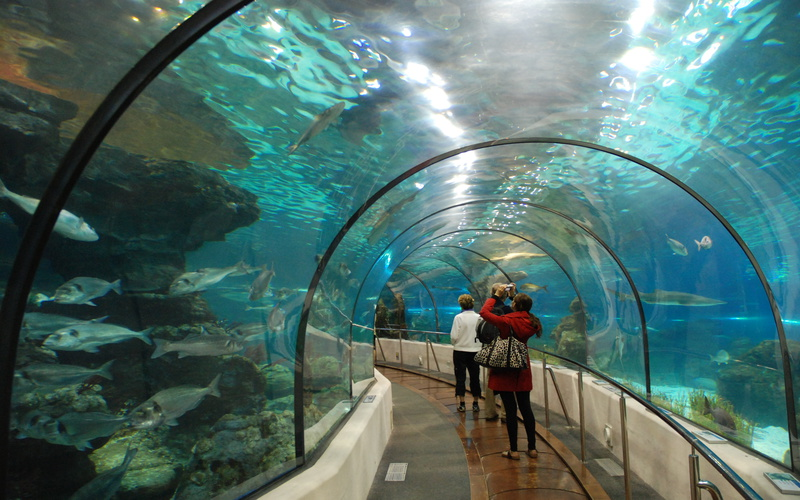

---



##**Fase 1** - Preparaci칩n del entorno

Crea un notebook llamado PW1_red_1_n.ipynb (donde n se corresponde con el identificador del grupo) en el servidor de notebooks de tu elecci칩n (Colab, Jupyter, etc.).

1. Crea un notebook llamado PW1_red_2_n.ipynb (donde n se corresponde con el identificador del grupo) en el servidor de notebooks de tu elecci칩n (Colab, Jupyter, etc.).
Descargar el dataset Download datasetcon las im치genes referentes a los ejemplos.

2. Examina el conjunto de datos para identificar las diferentes clases.

3. Prepara el conjunto de datos para el entrenamiento, transformando/escalando las caracter칤sticas y los valores de las clases (si es necesario).

4. Construir un algoritmo que permita agrupar los diferentes ejemplos disponibles en los datasets de entrenamiento, test y validaci칩n en clases mediante carpetas. Para poder realizar esta operaci칩n se dispone de fichero annotations.csv donde se indica para cada imagen la clase que le corresponde.

**IMPORTANTE: El conjunto de datos de entrenamiento debe ser el mismo para ambos procesos de entrenamiento.**



Importaci칩n de librer칤as al entorno de trabajo:

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Descompresi칩n del dataset y organizaci칩n de carpetas:

In [ ]:
# Ruta del archivo ZIP y carpeta destino
local_zip = "./practica_1_dataset.zip"
extract_folder = "./dataset"

# Descomprimir el archivo ZIP
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Descompresi칩n completada.")

# Definir rutas de carpetas
train_dir = os.path.join(extract_folder, 'train') # /content/dataset/train
test_dir = os.path.join(extract_folder, 'test')
valid_dir = os.path.join(extract_folder, 'valid')  # Si existe un conjunto de validaci칩n

# Verificar existencia de directorios
if os.path.exists(train_dir) and os.path.exists(test_dir):
    print(f"Directorio de entrenamiento encontrado: {train_dir}")
    print(f"Directorio de prueba encontrado: {test_dir}")
    print(f"Directorio de validaci칩n encontrado: {valid_dir}")
else:
    raise FileNotFoundError("ERROR: Verifica que el ZIP contiene 'train/' y 'test/' correctamente.")

Descompresi칩n completada.
Directorio de entrenamiento encontrado: ./dataset/train
Directorio de prueba encontrado: ./dataset/test
Directorio de validaci칩n encontrado: ./dataset/valid


__Nota__: se debe subir manualmente el dataset en formato zip.

## **Examinaci칩n del conjunto de datos:**

Veamos cu치ntas im치genes hay en cada carpeta.

In [ ]:
folders = ["train", "test", "valid"]
total = 0 # Para contar el n칰mero de im치genes totales

# Contar im치genes en cada carpeta
for folder in folders:
    folder_path = os.path.join(extract_folder, folder)
    if os.path.exists(folder_path):
        num_images = len([f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
        print(f"游늭 {folder}: {num_images} im치genes")
        total = total + num_images
    else:
        print(f"游뚿 La carpeta '{folder}' no existe.")

print(f"-------------------------\nTotal de im치genes: {total}")

游늭 train: 448 im치genes
游늭 test: 63 im치genes
游늭 valid: 127 im치genes
-------------------------
Total de im치genes: 638


Cada carpeta (`train`,`test` y `val`) contiene im치genes en formato .jpg y un csv de anotaciones. Por ejemplo:

游늭 La carpeta `val` contiene:
* 63 im치genes .jpeg

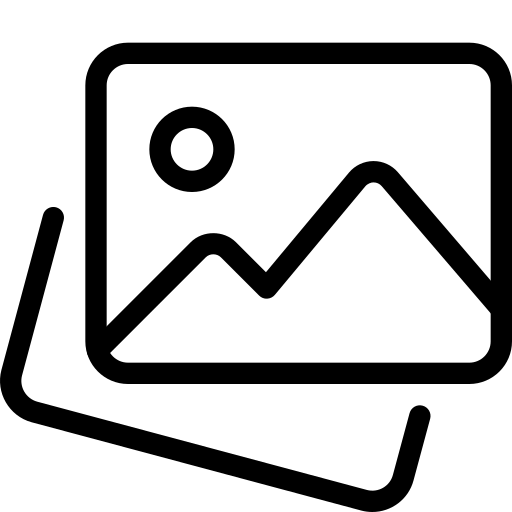

* Y un archivo `annotations.csv`:

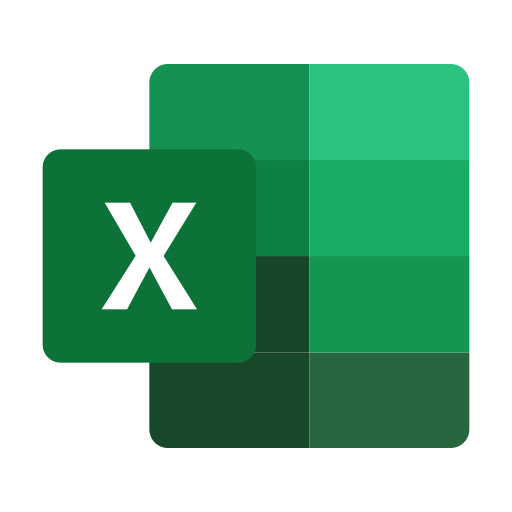

Se recomienda que los datos de validaci칩n supongan entre un `5-10%` del n칰mero de datos totales. En este caso los datos de validaci칩n son aproximadamente el `10%` del total.

A continuaci칩n se muestran las distintas clases del dataset y la distribuci칩n que siguen (n췈 de im치genes de cada clase).

In [ ]:
for folder in folders:
  # Cargar el CSV
  csv_path = "/content/dataset/" + folder + "/annotations.csv"
  df = pd.read_csv(csv_path)
  # Contar clases 칰nicas y su frecuencia
  class_counts = df["class"].value_counts()

  # Mostrar resultados
  print(f"游늭 {folder}")
  print("--------------------------------------------------------")
  print(class_counts)
  print("--------------------------------------------------------")



游늭 train
--------------------------------------------------------
class
fish         1961
jellyfish     385
penguin       330
shark         259
puffin        175
stingray      136
starfish       78
Name: count, dtype: int64
--------------------------------------------------------
游늭 test
--------------------------------------------------------
class
fish         249
jellyfish    154
penguin       82
shark         38
puffin        35
stingray      15
starfish      11
Name: count, dtype: int64
--------------------------------------------------------
游늭 valid
--------------------------------------------------------
class
fish         459
jellyfish    155
penguin      104
puffin        74
shark         57
stingray      33
starfish      27
Name: count, dtype: int64
--------------------------------------------------------


El `csv` tiene este formato de columnas:

In [ ]:
df.head(2)

filename  width  height class  \
0  IMG_2398_jpeg_jpg.rf.000bc0bd92988307264de7019...    768    1024  fish   
1  IMG_2398_jpeg_jpg.rf.000bc0bd92988307264de7019...    768    1024  fish   

   xmin  ymin  xmax  ymax  
0   635    54   767   276  
1   228   479   538   753

**Nota:** este dataFrame contiene `annotations.csv` de la carpeta 游늭`valid`. Mostramos un ejemplo de prueba.

In [ ]:
example_filename = df['filename'][0]
example_class = df['class'][0]

Si queremos imprimir del dataset de validaci칩n la primera imagen y su clase utilizamos el PATH: `valid_dir` +  `example_filename` que es el primer registro del `df`.

In [ ]:
example_filename

'IMG_2398_jpeg_jpg.rf.000bc0bd92988307264de7019fca4b57.jpg'

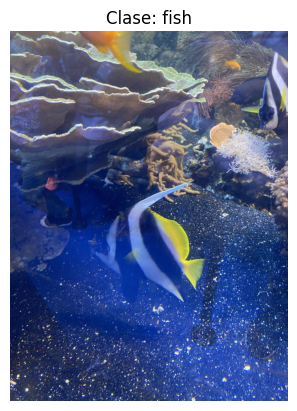

In [ ]:
img_path = valid_dir + '/' + example_filename
img = mpimg.imread(img_path)  # Leer la imagen

# Mostrar la imagen
plt.title(f'Clase: {example_class}')  # Agregar la clase en la leyenda
plt.imshow(img)
plt.axis('off')  # Desactivar ejes
plt.show()


游뚿 to do: alguna gr치fica con los recuentos por clase

游뚿  to do: organizar cada dato debe tener esta estructura:
[`matriz de la imagen`,`one hot encode de la clase`] para eso hay que usar el csv - investigar